<a href="https://colab.research.google.com/github/GothamAnupa/Credit-Risk-Prediction/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install pandas scikit-learn


In [ ]:

import pandas as pd

# Load the German Credit dataset with header=None
data = pd.read_csv("/content/german_credit_data.csv", header=None)

# Define the 10 column names (replace with your actual column names)
column_names = [
    "Checking account status",
    "Duration in month",
    "Credit history",
    "Purpose",
    "Credit amount",
    "Savings account/bonds",
    "Present employment since",
    "Installment rate in percentage of disposable income",
    "Personal status and sex",
    "Risk"  # Replace with actual column name for the target variable
]

# Assign the column names to the DataFrame
data.columns = column_names

# ... (rest of your code)

In [ ]:
# Step 2: Import libraries and load dataset
import pandas as pd

# Load the German Credit dataset (adjust the path if needed)
data = pd.read_csv("/content/german_credit_data.csv")

# Display first few rows of the dataset
print(data.head())


   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  


In [ ]:
# Step 3: Preprocess the Data

# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

# Encode categorical variables (if any)
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Separate features (X) and target (y)
X = data.drop('Purpose', axis=1)  # Replace 'Risk' with actual column name if needed
y = data['Purpose']


Missing values in the dataset:
Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


In [ ]:
# Step 4: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of the splits
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")


Training data size: (800, 9)
Testing data size: (200, 9)


In [ ]:
# Step 5: Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Step 6: Train the model
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Step 7: Make predictions
y_pred = model.predict(X_test)

# Display predictions
print("Predictions:", y_pred[:10])


Predictions: [1 1 4 5 1 1 5 5 1 1]


In [ ]:
# Step 8: Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 31.50%

Confusion Matrix:
[[ 3  6  0  0  2  7  0  0]
 [ 1 27  0  0  5 30  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  7  1  0  1  6  0  0]
 [ 1 20  0  0  7 16  0  0]
 [ 0 20  0  0  8 26  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.17      0.26        18
           1       0.32      0.43      0.36        63
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        15
           4       0.30      0.16      0.21        44
           5       0.31      0.48      0.37        54
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2

    accuracy                           0.32       200
   macro avg       0.19      0.15      0.15       200
weighted avg       0.30      0.32      0.29       200



In [ ]:
# Step 9: Predict for new data (example data point)
sample_data = [[22, 2, 4, 3, 2, 1200, 2, 4, 1]]  # Example data (adjust according to dataset columns)
sample_data_scaled = scaler.transform(sample_data)
prediction = model.predict(sample_data_scaled)
print("\nSample Data Prediction (Risk 1=Good, 0=Bad):", prediction)




Sample Data Prediction (Risk 1=Good, 0=Bad): [5]


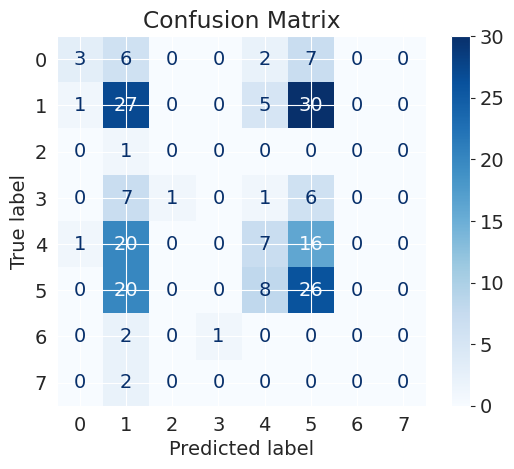

In [ ]:
# Import additional libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# 1. Plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    # Get unique class labels from y_test
    unique_labels = sorted(list(set(y_test)))

    cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred)





<Axes: >

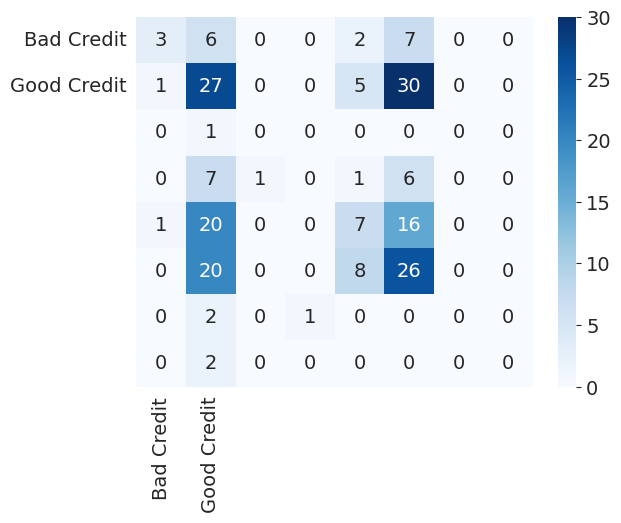

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Calculate the confusion matrix first
cm = confusion_matrix(y_test, y_pred)

# Now you can use cm in sns.heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad Credit", "Good Credit"], yticklabels=["Bad Credit", "Good Credit"])

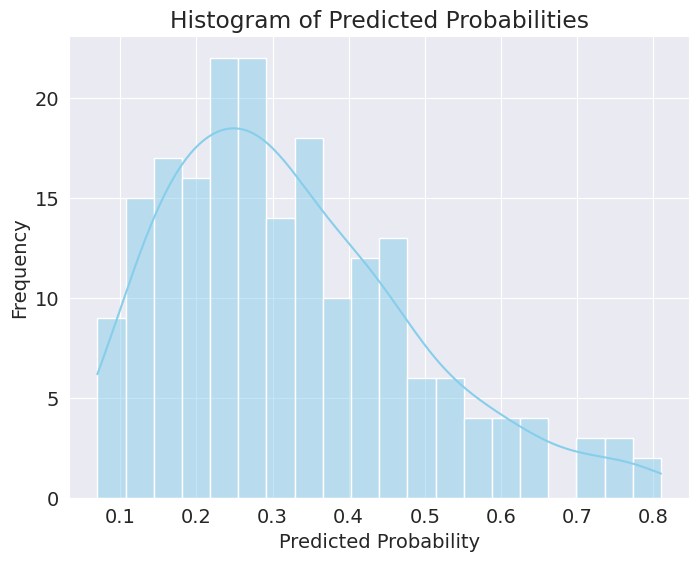

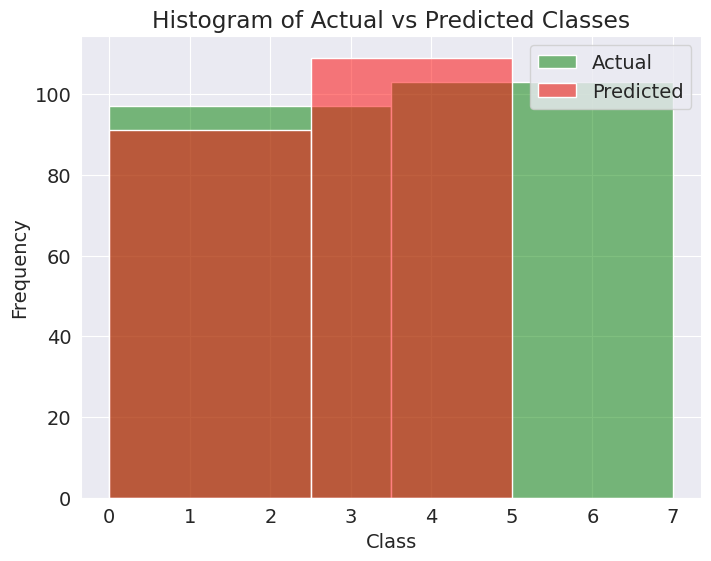

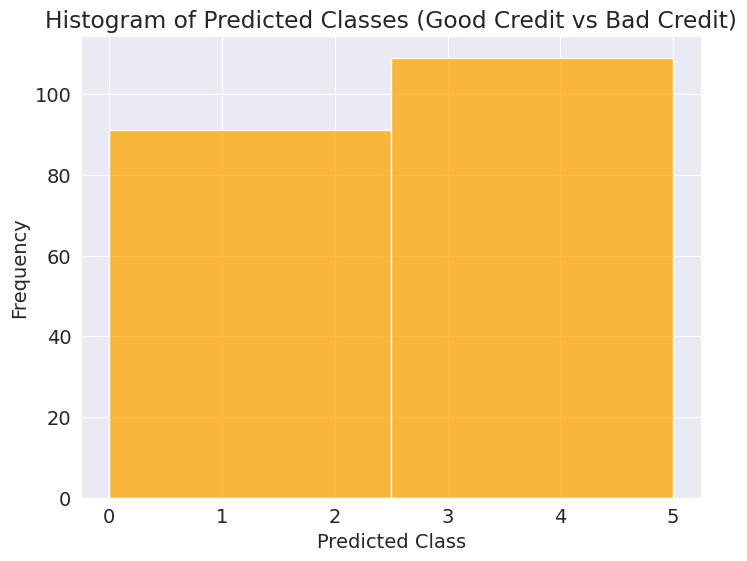

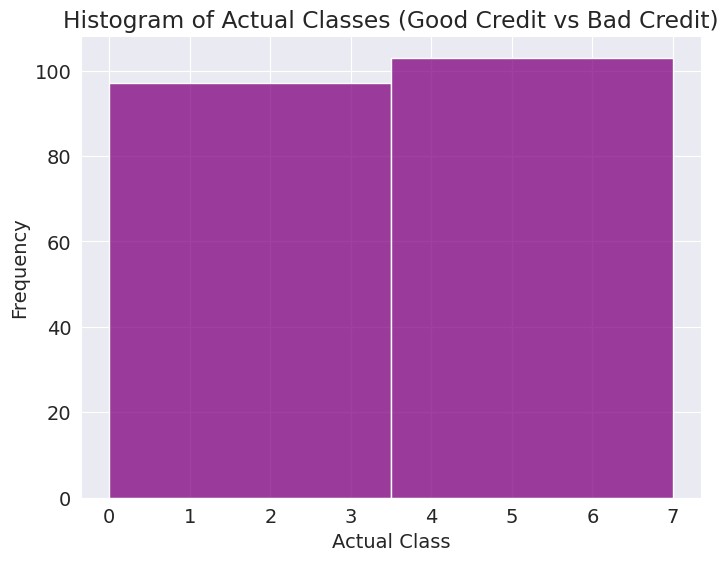

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram for Predicted Probabilities
def plot_predicted_probabilities(y_pred_proba):
    plt.figure(figsize=(8, 6))
    sns.histplot(y_pred_proba, kde=True, color="skyblue", bins=20)
    plt.title("Histogram of Predicted Probabilities")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")
    plt.show()

# 2. Histogram for Actual vs Predicted Classes
def plot_actual_vs_predicted_classes(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    sns.histplot(y_test, kde=False, color="green", label="Actual", bins=2, alpha=0.5)
    sns.histplot(y_pred, kde=False, color="red", label="Predicted", bins=2, alpha=0.5)
    plt.title("Histogram of Actual vs Predicted Classes")
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# 3. Histogram for Distribution of Predictions (Class Distribution)
def plot_prediction_class_distribution(y_pred):
    plt.figure(figsize=(8, 6))
    sns.histplot(y_pred, kde=False, color="orange", bins=2)
    plt.title("Histogram of Predicted Classes (Good Credit vs Bad Credit)")
    plt.xlabel("Predicted Class")
    plt.ylabel("Frequency")
    plt.show()

# 4. Histogram for Actual Class Distribution
def plot_actual_class_distribution(y_test):
    plt.figure(figsize=(8, 6))
    sns.histplot(y_test, kde=False, color="purple", bins=2)
    plt.title("Histogram of Actual Classes (Good Credit vs Bad Credit)")
    plt.xlabel("Actual Class")
    plt.ylabel("Frequency")
    plt.show()

# Example usage:
# Assuming you have y_test (actual labels) and y_pred (predicted labels) from the model's predictions

# 1. Plot predicted probabilities (if model is using probability estimates)
# Calculate y_pred_proba using predict_proba and select the probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # This line was previously commented out
plot_predicted_probabilities(y_pred_proba)

# 2. Plot actual vs predicted classes
plot_actual_vs_predicted_classes(y_test, y_pred)

# 3. Plot distribution of predicted classes
plot_prediction_class_distribution(y_pred)

# 4. Plot actual class distribution
plot_actual_class_distribution(y_test)